In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, hist2dbins=512):
    perturb = np.random.normal(
        size=(num_samples, base_poly.shape[0]),
        scale=stdev
    ).astype(np.complex128)
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
        
    plt.figure(figsize=(18,4))
    plt.subplot(1, 3, 1)
    root_radii = np.absolute(roots.flatten())
    plt.hist(
        root_radii,
        bins=256,
        range=(np.percentile(root_radii, 1) - 0.1, np.percentile(root_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("radius")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 2)
    plt.hist(
        np.angle(roots.flatten()),
        bins=64,
        density=True,
    )
    plt.xlabel("angle")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 3)
    plt.hist2d(
        x=roots.flatten().real,
        y=roots.flatten().imag,
        bins=hist2dbins,
    )
    plt.axis('square')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f"deg={base_poly.shape[0] - 1}")

## Perturbing z^n
Each of the lower degree coefficients is a standard complex normal distribution with unit variance.

We plot $n = 3, 10, 100$ below.
We see that $n$ increases the distribution of the radius of the roots gets tighter around 1.

CPU times: user 3.38 s, sys: 34.3 ms, total: 3.41 s
Wall time: 3.43 s


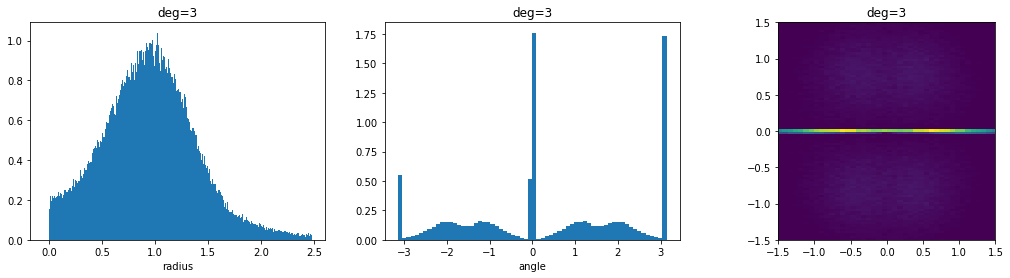

In [12]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 3 * [0], dtype=np.complex128),
    num_samples=40000,
    hist2dbins=128,
)

CPU times: user 933 ms, sys: 11.2 ms, total: 944 ms
Wall time: 947 ms


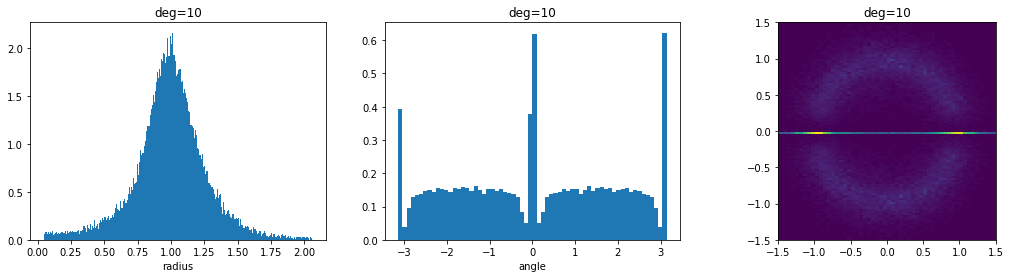

In [11]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=5000,
    hist2dbins=128,
)

CPU times: user 1min 44s, sys: 532 ms, total: 1min 45s
Wall time: 26.6 s


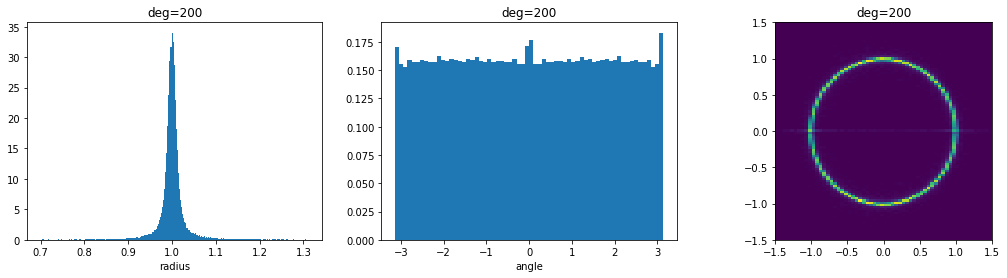

In [14]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 100 * [0], dtype=np.complex128),
    num_samples=500,
    hist2dbins=128,
)